In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28一维向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))！
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'],
             )

In [4]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [5]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [10]:
history = model.fit(train_image,train_label_onehot,
                    epochs=10,
                   validation_data=(test_image,test_label_onehot)
                   )

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.0317 - acc: 0.2022 - val_loss: 1.7425 - val_acc: 0.2828
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.8476 - acc: 0.2477 - val_loss: 1.6565 - val_acc: 0.3177
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.7707 - acc: 0.2832 - val_loss: 1.6312 - val_acc: 0.3078
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.7513 - acc: 0.2976 - val_loss: 1.6291 - val_acc: 0.2862
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.7194 - acc: 0.3105 - val_loss: 1.5906 - val_acc: 0.3146
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.7061 - acc: 0.3099 - val_loss: 1.6247 - val_acc: 0.2881
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.6985 - acc: 0.3131 - val_loss: 1.5925 - val_acc: 0.3160
Epoch 8/10
1875/1875 [==============================] -

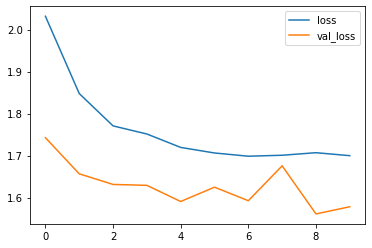

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.legend()

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

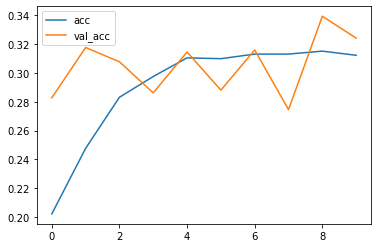

In [13]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.legend()